<a href="https://colab.research.google.com/github/johnvb21/CNN/blob/main/Foodvision1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import pathlib

In [ ]:
import matplotlib.image as mpimg
import random

In [ ]:
#This function allows us to generate a random image from our Data Set

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)
Image shape: (306, 512, 3)


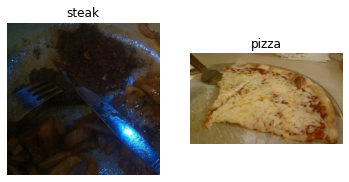

In [ ]:
#Here we are visualizing the random images from each class
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("/content/drive/MyDrive/pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("/content/drive/MyDrive/pizza_steak/train/", "pizza")


In [ ]:
#define directory dataset paths
train_dir = "/content/drive/MyDrive/pizza_steak/train/"
test_dir = "/content/drive/MyDrive/pizza_steak/test/"

#preprocessing data through normalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=(1./255))
test_datagen = ImageDataGenerator(rescale=(1./255))

In [ ]:
#load in image data from directories and turn into batches

In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.


In [ ]:
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             batch_size = 32)

Found 500 images belonging to 2 classes.


In [ ]:
#getting a sample of a training data batch
images, labels = train_data.next()
#We can see that the input images are tensors with pixel data
images

array([[[[0.427451  , 0.227451  , 0.3019608 ],
         [0.42352945, 0.21176472, 0.30588236],
         [0.43529415, 0.21568629, 0.32156864],
         ...,
         [0.23529413, 0.24313727, 0.2901961 ],
         [0.227451  , 0.24313727, 0.28627452],
         [0.21176472, 0.23529413, 0.28235295]],

        [[0.42352945, 0.22352943, 0.2901961 ],
         [0.4431373 , 0.23137257, 0.32156864],
         [0.43921572, 0.21960786, 0.3254902 ],
         ...,
         [0.25882354, 0.25882354, 0.30588236],
         [0.2509804 , 0.25882354, 0.30588236],
         [0.2392157 , 0.25490198, 0.3019608 ]],

        [[0.44705886, 0.24705884, 0.3137255 ],
         [0.43137258, 0.227451  , 0.3137255 ],
         [0.42352945, 0.20392159, 0.3019608 ],
         ...,
         [0.2627451 , 0.2627451 , 0.30980393],
         [0.25882354, 0.26666668, 0.3137255 ],
         [0.2509804 , 0.25882354, 0.30588236]],

        ...,

        [[0.36862746, 0.18431373, 0.22352943],
         [0.36862746, 0.18039216, 0.227451  ]

In [ ]:
#We can see that the output values are binary, for each option: pizza and steak
labels

array([0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.],
      dtype=float32)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
#Creating the Convolutional Model

model = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=(1,1),
         padding="valid",
         activation="relu",
         input_shape = (224,224,3)), #input layer

  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid")     #output layer               
])

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#we will check the length of training and validation data
len(train_data), len(test_data)

(47, 16)

In [ ]:
#Now we fit the model
history = model.fit(train_data, #train_data contains a combination of both labels and pixel values
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 293s 6s/step - loss: 0.5737 - accuracy: 0.6893 - val_loss: 0.3862 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 16s 348ms/step - loss: 0.3933 - accuracy: 0.8207 - val_loss: 0.3580 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 16s 342ms/step - loss: 0.2703 - accuracy: 0.8973 - val_loss: 0.3608 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 16s 338ms/step - loss: 0.1159 - accuracy: 0.9700 - val_loss: 0.4639 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 16s 331ms/step - loss: 0.0400 - accuracy: 0.9913 - val_loss: 0.5995 - val_accuracy: 0.8040


Evaluating our model:

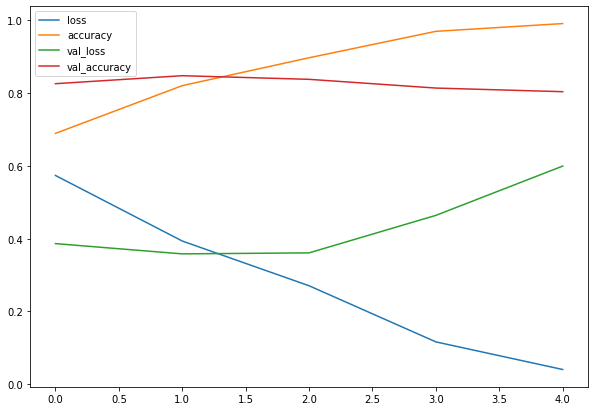

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))

In [ ]:
# Here I will plot the validation and training curves seperately
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history['val_loss']
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.figure()
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


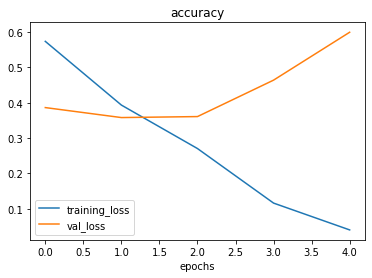

In [ ]:
#Check the loss and accuracy of the model
plot_loss_curves(history)

In [ ]:
# there seems to be overfitting on the training data, so we need to address this with pooling layers

In [ ]:
model_2 = Sequential([
  Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3, activation = "relu"),
  MaxPool2D(),
  Conv2D(10,3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                      
])

In [ ]:
#compile the model

In [ ]:
model_2.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_2 = model_2.fit(train_data,
                        epochs=7,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/7
47/47 [==============================] - 16s 319ms/step - loss: 0.6079 - accuracy: 0.6667 - val_loss: 0.5195 - val_accuracy: 0.7720
Epoch 2/7
47/47 [==============================] - 15s 320ms/step - loss: 0.4976 - accuracy: 0.7713 - val_loss: 0.4174 - val_accuracy: 0.8300
Epoch 3/7
47/47 [==============================] - 14s 306ms/step - loss: 0.4539 - accuracy: 0.7867 - val_loss: 0.4081 - val_accuracy: 0.8280
Epoch 4/7
47/47 [==============================] - 14s 298ms/step - loss: 0.4200 - accuracy: 0.8180 - val_loss: 0.4509 - val_accuracy: 0.7900
Epoch 5/7
47/47 [==============================] - 14s 295ms/step - loss: 0.3835 - accuracy: 0.8440 - val_loss: 0.3592 - val_accuracy: 0.8600
Epoch 6/7
47/47 [==============================] - 14s 294ms/step - loss: 0.3426 - accuracy: 0.8673 - val_loss: 0.3404 - val_accuracy: 0.8460
Epoch 7/7
47/47 [==============================] - 14s 296ms/step - loss: 0.3130 - accuracy: 0.8660 - val_loss: 0.2992 - val_accuracy: 0.8860


In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 10)      

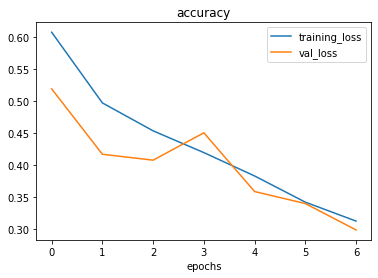

In [ ]:
plot_loss_curves(history_2)

In [ ]:
# There is some improvement from the first model after adding pooling layers.

In [ ]:
# Create ImageDataGenerator training instance with data augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

In [ ]:
# Create ImageDataGenerator training instance without data augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
#Data Augmentation to induce regularization
print("Augmented Training Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)

Augmented Training Data
Found 1500 images belonging to 2 classes.


In [ ]:
# Non-Augmented Data

In [ ]:
print("Non_augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

Non_augmented training data:
Found 1500 images belonging to 2 classes.


In [ ]:
IMG_SIZE = (224,224)
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir, 
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Non-augmented test data:
Found 500 images belonging to 2 classes.


In [ ]:
# visualize augmented data

In [ ]:
images, labels = train_data.next()

In [ ]:
augmented_images, augmented_labels = train_data_augmented.next()

In [ ]:
import random

In [ ]:
random_number = random.randint(0,32)

showing image number 22


(-0.5, 223.5, 223.5, -0.5)

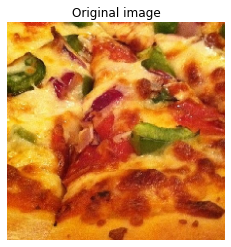

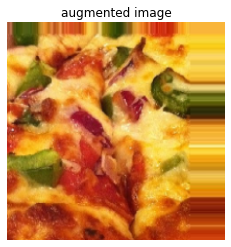

In [ ]:
print(f'showing image number {random_number}')
plt.imshow(images[random_number])
plt.title(f'Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"augmented image")
plt.axis(False)

In [ ]:
model_3 = Sequential([
  Conv2D(10,3, activation= "relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10,3, activation="relu"),
  MaxPool2D(),
  Conv2D(10,3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                      
])